<a href="https://colab.research.google.com/github/ArseniyKoz/uni.neuralnetworks/blob/main/nn_practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

<ipython-input-1-5b602ad12930>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [2]:
import torch
print("Using torch", torch.__version__)

Using torch 2.5.1+cu124


In [3]:
torch.manual_seed(42) # Setting the seed

Tensors

In [4]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[2.8334e-08, 4.5642e-41, 2.8334e-08, 4.5642e-41],
         [2.5640e-33, 0.0000e+00, 2.5640e-33, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 2.5640e-33, 0.0000e+00]],

        [[2.5641e-33, 0.0000e+00, 1.4013e-45, 0.0000e+00],
         [2.5640e-33, 0.0000e+00, 2.5640e-33, 0.0000e+00],
         [3.3631e-44, 3.0981e+32, 1.3871e-38, 0.0000e+00]]])


In [5]:
x = torch.zeros(2, 3, 4)
print(x)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [6]:
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [7]:
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [8]:
shape = x.shape
print("Shape:", x.shape)
size = x.size()
print("Size:", size)
dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


Tensor to Numpy, and Numpy to Tensor

In [9]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [10]:
tensor = torch.arange(4)
np_arr = tensor.numpy()
print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


Операции с тензорами

In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2
print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [12]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)

print("X1 (before)", x1)
print("X2 (before)", x2)
x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In [13]:
x = torch.arange(6)
print("X", x)

x = x.view(2, 3)
print("X", x)

x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])
X tensor([[0, 1, 2],
        [3, 4, 5]])
X tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [14]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [15]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [16]:
h = torch.matmul(x, W)
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


Индексация

In [17]:
x = torch.arange(12).view(3, 4)
print("X", x)
print(x[:, 1]) #второй столбец
print(x[0]) # Первая строка
print(x[:2, -1]) # Первые две строки, последний столбец
print(x[1:3, :]) # две строки в середине

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Динамический граф вычислений и обратное распространение

In [18]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [19]:
x.requires_grad_(True)
print(x.requires_grad)

True


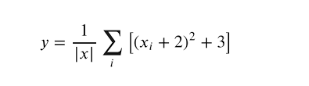



In [20]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [21]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [22]:
y.backward()

In [23]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


Поддержка GPU

In [24]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [25]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [26]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [27]:
x = torch.randn(5000, 5000)
## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")
## GPU version
x = x.to(device)
_ = torch.matmul(x, x) # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize() # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s") # Milliseconds to seconds

CPU time: 8.18589s
GPU time: 0.07022s


Генерация случайных чисел

In [28]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
  torch.cuda.manual_seed(42)
  torch.cuda.manual_seed_all(42)
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Обучение сети. Непрерывный XOR

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
# Шаблон модуля
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()
    # Some init for my module
  def forward(self, x):
    # Function for performing the calculation of the module.
    pass

In [31]:
class SimpleClassifier(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super().__init__()
# Initialize the modules we need to build the network
    self.linear1 = nn.Linear(num_inputs, num_outputs)

  def forward(self, x):
# Perform the calculation of the model to determine the prediction
    x = self.linear1(x)
    return x

In [32]:
model = SimpleClassifier(num_inputs=2, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
)


In [33]:
for name, param in model.named_parameters():
  print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([1, 2])
Parameter linear1.bias, shape torch.Size([1])


Данные

In [34]:
import torch.utils.data as data

In [35]:
class XORDataset(data.Dataset):
  def __init__(self, size, std=0.1):
    """
    Inputs:
    size - Number of data points we want to generate
    std - Standard deviation of the noise (see generate_continuous_xor function)

    """
    super().__init__()
    self.size = size
    self.std = std
    self.generate_continuous_xor()

  def generate_continuous_xor(self):
    # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
    # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
    # If x=y, the label is 0.
    data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
    label = (data.sum(dim=1) == 1).to(torch.long)
    # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
    data += self.std * torch.randn(data.shape)
    self.data = data
    self.label = label

  def __len__(self):
    # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
    return self.size

  def __getitem__(self, idx):
    # Return the idx-th data point of the dataset
    # If we have multiple things to return (data point and label), we can return them as tuple
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label

In [36]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([1.0589, 0.9475]), tensor(0))


In [37]:
def visualize_samples(data, label):
  if isinstance(data, torch.Tensor):
    data = data.cpu().numpy()
  if isinstance(label, torch.Tensor):
    label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

  plt.figure(figsize=(4,4))
  plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
  plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
  plt.title("Dataset samples")
  plt.ylabel(r"$x_2$")
  plt.xlabel(r"$x_1$")

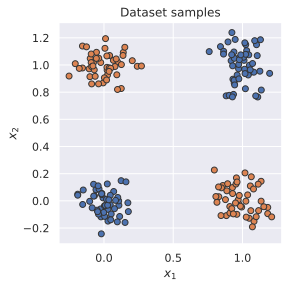

In [38]:
visualize_samples(dataset.data, dataset.label)
plt.show()

Data loader класс

In [39]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [40]:
data_inputs, data_labels = next(iter(data_loader))
# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.9692,  0.0072],
        [ 0.9221,  1.0758],
        [ 0.0264, -0.0319],
        [ 0.9381,  1.0959],
        [ 0.9236,  1.2389],
        [ 0.0389, -0.1386],
        [ 1.0270, -0.1197],
        [ 0.8955,  1.1699]])
Data labels torch.Size([8]) 
 tensor([1, 0, 0, 0, 0, 0, 1, 0])


Стохастическая оптимизация

После определения модели и набора данных, настало время выполнить оптимизацию модели. Во время тренировки, мы выполняем
следующие шаги:
1. Получаем пакет данных из загрузчика данных.
2. Получаем предсказания модели для пакета данных.
3. Вычисляем функцию потерь на основе разницы между предсказаниями и метками.
4. Обратное распространение: вычисляем градиенты для каждого параметра относительно функции потерь.
5. Обновляем параметры модели в направлении градиентов.

Функция ошибки

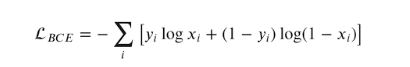


In [41]:
loss_module = nn.BCEWithLogitsLoss()

Стохастический градиентный спуск

In [42]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Обучение

In [43]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [44]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
)

In [45]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
  # Set model to train mode
  model.train()
  # Training loop
  for epoch in tqdm(range(num_epochs)):
    for data_inputs, data_labels in data_loader:
      ## Step 1: Move input data to device (only strictly necessary if we use GPU)
      data_inputs = data_inputs.to(device)
      data_labels = data_labels.to(device)
      ## Step 2: Run the model on the input data
      preds = model(data_inputs)
      preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
      ## Step 3: Calculate the loss
      loss = loss_module(preds, data_labels.float())
      ## Step 4: Perform backpropagation
      # Before calculating the gradients, we need to ensure that they are all zero.
      # The gradients would not be overwritten, but actually added to the existing ones.
      optimizer.zero_grad()
      # Perform backpropagation
      loss.backward()
      ## Step 5: Update the parameters
      optimizer.step()

In [46]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

Сохранение модели

In [47]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.0628, -0.0229]], device='cuda:0')), ('linear1.bias', tensor([0.0580], device='cuda:0'))])


In [48]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.pth")

In [49]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.pth")
# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_outputs=1)
new_model.load_state_dict(state_dict)
# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-0.0628, -0.0229]], device='cuda:0')), ('linear1.bias', tensor([0.0580], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-0.0628, -0.0229]])), ('linear1.bias', tensor([0.0580]))])


<ipython-input-49-b4862e24f7ce>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("our_model.pth")


Оценка качества

In [50]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [51]:
def eval_model(model, data_loader):
  model.eval() # Set model to eval mode
  true_preds, num_preds = 0., 0.
  with torch.no_grad(): # Deactivate gradients for the following code
    for data_inputs, data_labels in data_loader:
      # Determine prediction of model on dev set
      data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
      preds = model(data_inputs)
      preds = preds.squeeze(dim=1)
      preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
      pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
      # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
      true_preds += (pred_labels == data_labels).sum()
      num_preds += data_labels.shape[0]
  acc = true_preds / num_preds
  print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [52]:
eval_model(model, test_data_loader)

Accuracy of the model: 58.40%


In [53]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
  if isinstance(data, torch.Tensor):
    data = data.cpu().numpy()
  if isinstance(label, torch.Tensor):
    label = label.cpu().numpy()
  data_0 = data[label == 0]
  data_1 = data[label == 1]
  fig = plt.figure(figsize=(4,4), dpi=500)
  plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
  plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
  plt.title("Dataset samples")
  plt.ylabel(r"$x_2$")
  plt.xlabel(r"$x_1$")
  plt.legend()
  # Let's make use of a lot of operations we have learned above
  model.to(device)
  c0 = torch.Tensor(to_rgba("C0")).to(device)
  c1 = torch.Tensor(to_rgba("C1")).to(device)
  x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
  x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
  xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij') # Meshgrid function as in numpy
  model_inputs = torch.stack([xx1, xx2], dim=-1)
  preds = model(model_inputs)
  preds = torch.sigmoid(preds)
  output_image = (1 - preds) * c0[None,None] + preds * c1[None,None] # Specifying "None" in a dimension creates a new one
  output_image = output_image.cpu().numpy() # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
  plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
  plt.grid(False)
  return fig

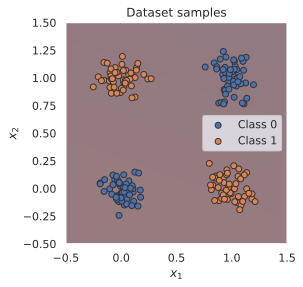

In [54]:
_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()